In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data observation

In [2]:
#get csv data
data = pd.read_csv('HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
#Simple descriptive statistics (numerical features)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [5]:
#Simple descriptive statistics (text-based features)
data.describe(include=['O']).T

,count,unique,top,freq
sales,14999,10,sales,4140
salary,14999,3,low,7316


# Data Cleaning

In [6]:
#there is no null
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
#there are 3008 dupliceted data,but this data set has no data that must be unique.Ignore it
data.duplicated().sum()

3008

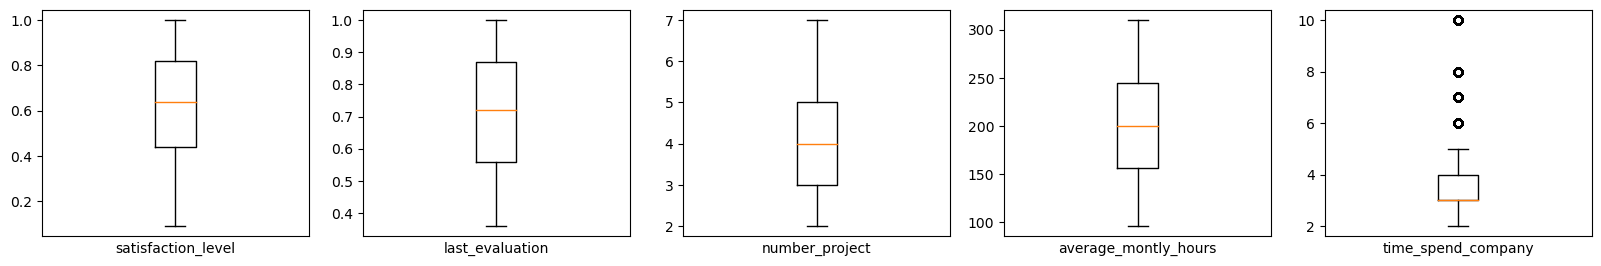

In [8]:
plt.figure(figsize=(20,3),dpi=100)
for i in range(0,5,1):
    plt.subplot(1,5,i+1)
    plt.boxplot(data.iloc[:,i])
    plt.xlabel(data.columns[i])
    plt.xticks([])

# Data exploration

## Column of left

In [9]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [10]:
data['left'].value_counts()/data['left'].shape[0]

0    0.761917
1    0.238083
Name: left, dtype: float64

In [11]:
v1 = data['left'].value_counts()/data['left'].shape[0]

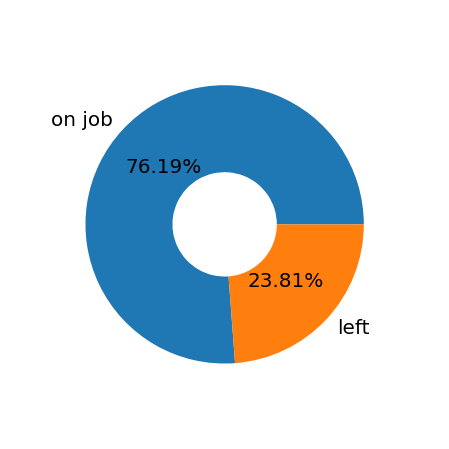

In [12]:
plt.figure(figsize=(8,8))
plt.pie(v1,
       radius=0.8,
       labels=['on job','left'],
       autopct='%.2f%%',
        labeldistance=1.1,
        textprops={'fontsize':20},
        wedgeprops={'width':0.5}
       )
plt.show()

## relationship between satisfaction level and sales

In [13]:
import seaborn as sns

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

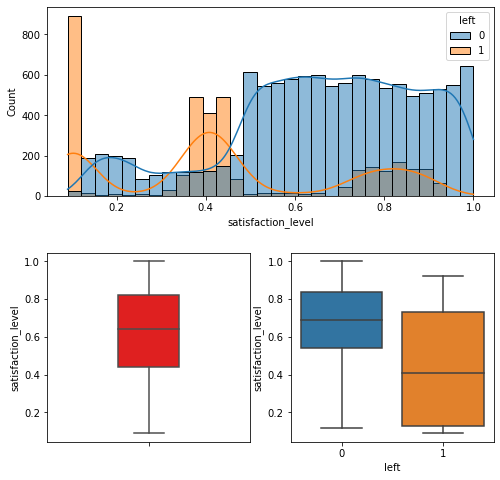

In [14]:
plt.figure(figsize=(8,8))
grid = plt.GridSpec(2,2,wspace=0.2,hspace=0.3)

plt.subplot(grid[0,:])
sns.histplot(data=data,x='satisfaction_level',hue='left',kde=True)
plt.subplot(grid[1,0])
sns.boxplot(data=data,y='satisfaction_level',color='red',width=0.3)
plt.subplot(grid[1,1])
sns.boxplot(data=data, y='satisfaction_level',x='left')

## What are the commonalities of employees who leave with very low satisfaction with the company?

In [15]:
data['satisfaction_level'].min()

0.09

In [16]:
data[data['satisfaction_level']==0.09]['left'].value_counts()

1    195
Name: left, dtype: int64

In [17]:
data[data['satisfaction_level']==0.09].describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,195.0,0.090000,9.739457e-17,0.09,0.09,0.09,0.090,0.09
last_evaluation,195.0,0.871538,7.078858e-02,0.62,0.82,0.87,0.935,0.98
number_project,195.0,6.179487,5.951607e-01,3.00,6.00,6.00,6.500,7.00
average_montly_hours,195.0,275.692308,2.031067e+01,214.00,257.50,275.00,294.000,310.00
time_spend_company,195.0,4.107692,3.980524e-01,2.00,4.00,4.00,4.000,5.00
Work_accident,195.0,0.020513,1.421113e-01,0.00,0.00,0.00,0.000,1.00
left,195.0,1.000000,0.000000e+00,1.00,1.00,1.00,1.000,1.00
promotion_last_5years,195.0,0.000000,0.000000e+00,0.00,0.00,0.00,0.000,0.00


In [18]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [19]:
Ls = data.loc[(data['satisfaction_level']<0.13)&(data['left']==0),:]
Ls.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,26.0,0.120000,8.491573e-17,0.12,0.1200,0.12,0.1200,0.12
last_evaluation,26.0,0.670385,1.644258e-01,0.39,0.5575,0.63,0.8175,0.95
number_project,26.0,4.423077,1.205755e+00,2.00,3.2500,4.50,5.0000,6.00
average_montly_hours,26.0,225.576923,4.575340e+01,110.00,191.7500,238.50,257.7500,287.00
time_spend_company,26.0,4.269231,1.282426e+00,2.00,3.0000,4.00,5.0000,6.00
Work_accident,26.0,0.076923,2.717465e-01,0.00,0.0000,0.00,0.0000,1.00
left,26.0,0.000000,0.000000e+00,0.00,0.0000,0.00,0.0000,0.00
promotion_last_5years,26.0,0.000000,0.000000e+00,0.00,0.0000,0.00,0.0000,0.00


<AxesSubplot:>

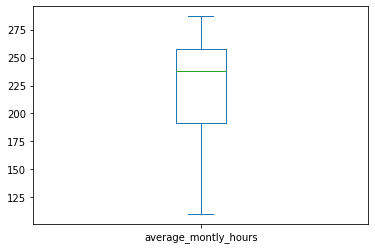

In [20]:
Ls['average_montly_hours'].plot(kind='box')

## The relationship between the latest appraisal assessment and whether to leave

<AxesSubplot:xlabel='left', ylabel='last_evaluation'>

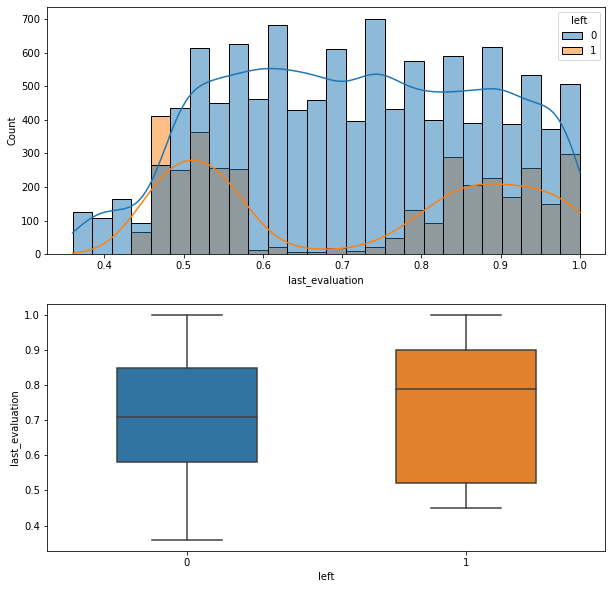

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(211)
sns.histplot(data=data,x='last_evaluation',hue='left',kde=True)
plt.subplot(212)
sns.boxplot(data=data, x='left',y='last_evaluation',width=0.5)

## The relationship between the number of projects attended and whether to leave

In [22]:
v2 = data['number_project'].value_counts(sort=False)
v2

2    2388
5    2761
7     256
6    1174
4    4365
3    4055
Name: number_project, dtype: int64

In [23]:
v3 = data.groupby(['number_project'],as_index=False,sort=False).size()
v3

,number_project,size
0,2,2388
1,5,2761
2,7,256
3,6,1174
4,4,4365
5,3,4055


In [24]:
v2_rate = data.groupby(['number_project','left'],as_index=False).size()
v2_rate = v2_rate.pivot(index='number_project',columns='left',values='size')
v2_rate

left,0,1
number_project,,
2,821.0,1567.0
3,3983.0,72.0
4,3956.0,409.0
5,2149.0,612.0
6,519.0,655.0
7,NaN,256.0


In [25]:
v2_rate = v2_rate.div(v2_rate.sum(axis=1),axis=0)
v2_rate.fillna(0,inplace=True) #replace NaN into 0
v2_rate

left,0,1
number_project,,
2,0.343802,0.656198
3,0.982244,0.017756
4,0.906300,0.093700
5,0.778341,0.221659
6,0.442078,0.557922
7,0.000000,1.000000


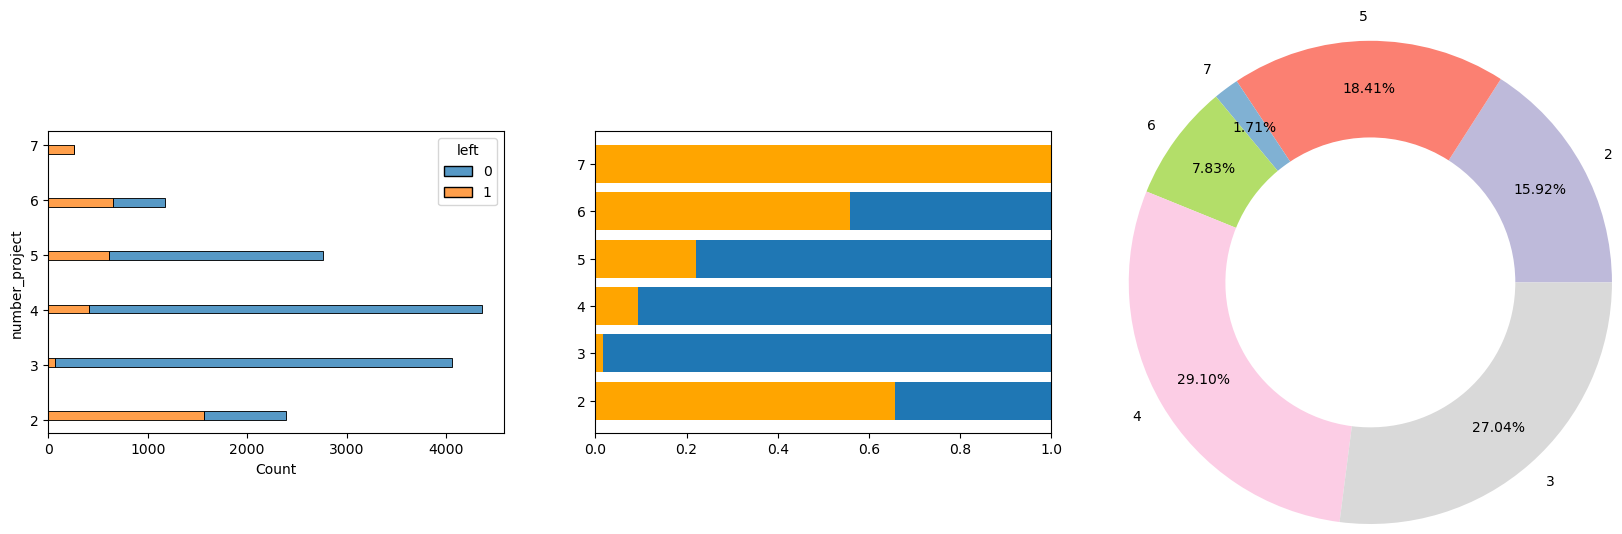

In [26]:
colors = plt.get_cmap('Set3')(np.linspace(0.2,0.7,len(v2)))
plt.figure(figsize=(20,4),dpi=100)

#Plotting the number of departures of personnel involved in different project numbers
plt.subplot(131)
sns.histplot(data=data,y='number_project',hue='left',multiple='stack')

#Mapping the relationship between the projects attended and whether or not to leave
plt.subplot(132)
plt.barh(y=v2_rate.index,width=v2_rate.iloc[:,1],color='orange')
plt.barh(y=v2_rate.index,width=v2_rate.iloc[:,0],left=v2_rate.iloc[:,1])

#Plotting a ring chart of the percentage of the number of items
plt.subplot(133)
plt.pie(v2,autopct="%.2f%%",radius=2,pctdistance=0.8,labels=v2.index,colors=colors,wedgeprops = {'width': 0.8})
plt.show()

#### As can be seen from the above chart, the percentage of leavers increases with the number of projects

## The relationship between the average monthly working hours and whether to leave

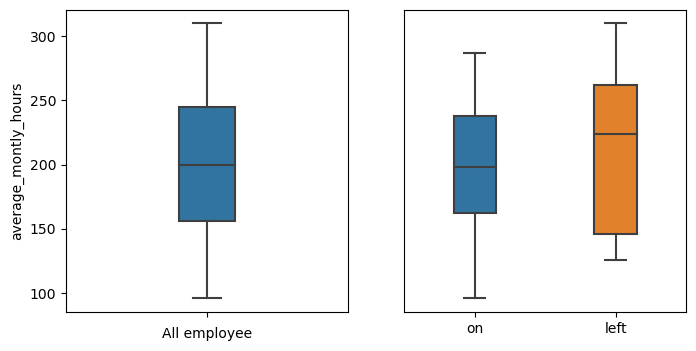

In [27]:
fig,ax=plt.subplots(1,2,figsize=(8,4),dpi=100)

sns.boxplot(data=data,y='average_montly_hours',ax=ax[0],width=0.2)
sns.boxplot(data=data,y='average_montly_hours',x='left',width=0.3)

ax[0].set_xlabel('All employee')
ax[1].set_yticks([])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_xticklabels(['on','left'])

plt.show()

#### As we can see from above, the average working hours of the leavers are relatively long, and the minimum, median and maximum values are significantly higher than those of the current employees

In [28]:
data.groupby("left").agg({"average_montly_hours":["min","max","mean","median"]})/22 #22 working days

average_montly_hours                                
                      min        max      mean     median
left                                                     
0                4.363636  13.045455  9.048191   9.000000
1                5.727273  14.090909  9.428146  10.181818

## The relationship between years of service and whether to leave

In [29]:
v3 = data['time_spend_company'].value_counts()
v3.sort_index(inplace=True)
v3

2     3244
3     6443
4     2557
5     1473
6      718
7      188
8      162
10     214
Name: time_spend_company, dtype: int64

In [30]:
v3_rate = data.groupby(['time_spend_company','left'],as_index=False).size()
v3_rate = v3_rate.pivot(index='time_spend_company',columns='left',values='size')
v3_rate = v3_rate.div(v3_rate.sum(axis=1),axis=0)
v3_rate.fillna(0,inplace=True)
v3_rate

left,0,1
time_spend_company,,
2,0.983662,0.016338
3,0.753841,0.246159
4,0.651936,0.348064
5,0.434487,0.565513
6,0.708914,0.291086
7,1.000000,0.000000
8,1.000000,0.000000
10,1.000000,0.000000


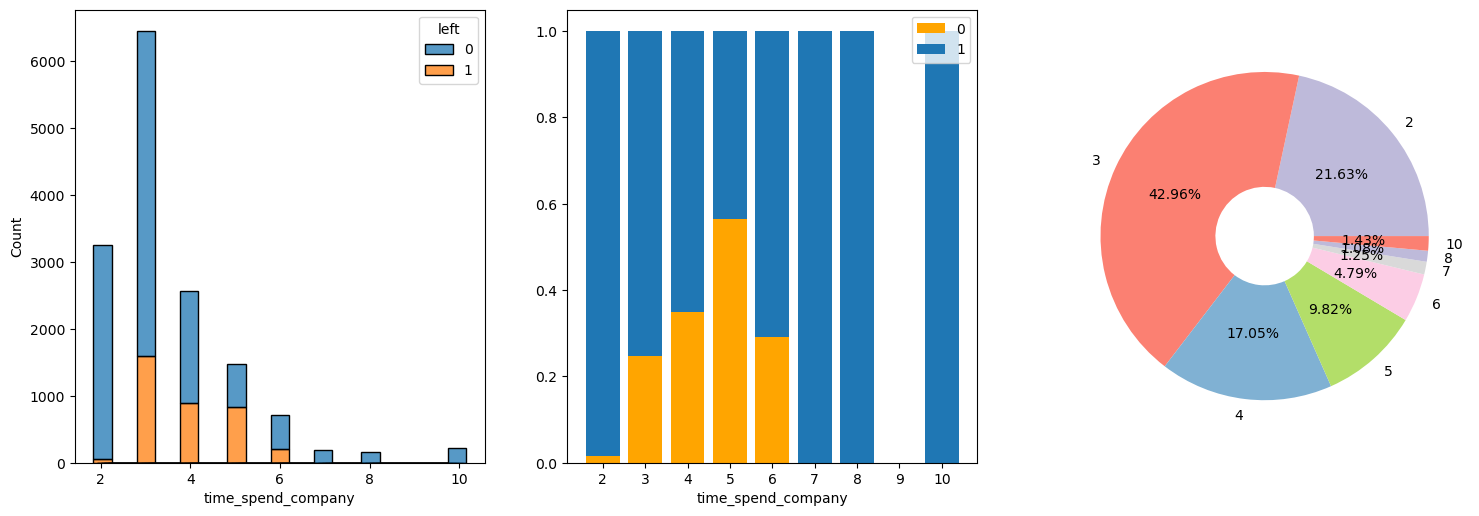

In [31]:
plt.figure(figsize=(18,6),dpi=100)

plt.subplot(131)
sns.histplot(data=data,x='time_spend_company',hue='left',multiple='stack',shrink=5)

plt.subplot(132)
plt.bar(x=v3_rate.index,height=v3_rate[1],color='orange')
plt.bar(x=v3_rate.index,height=v3_rate[0],bottom=v3_rate[1])
plt.xlabel('time_spend_company')
plt.xticks(np.arange(2,11))
plt.legend(v3_rate.columns)

plt.subplot(133)
plt.pie(v3,autopct='%0.2f%%',colors=colors,labeldistance=1.1,labels=v3.index,radius=1,wedgeprops = {'width': 0.7})
plt.show()

#### Leavers are concentrated in 3,4,5,6 years, while more than 6 years are relatively stable

## The relationship between work-related accidents and left

In [32]:
data['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [33]:
v4_rate = data.groupby(['Work_accident','left'],as_index=False).size()
v4_rate = v4_rate.pivot(index='Work_accident',columns='left',values='size')
v4_rate = v4_rate.div(v4_rate.sum(axis=1),axis=0)
v4_rate

left,0,1
Work_accident,,
0,0.734840,0.265160
1,0.922084,0.077916


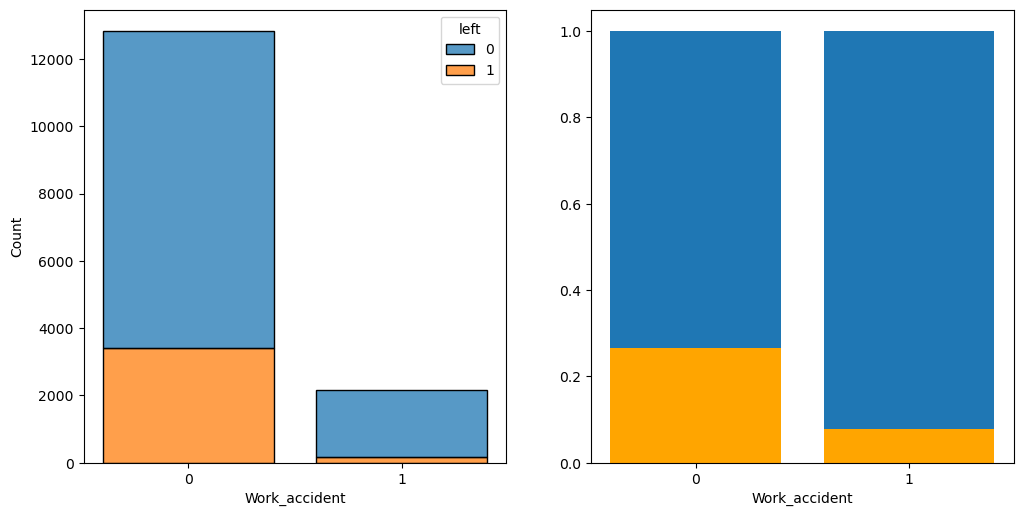

In [34]:
fig,ax=plt.subplots(1,2,figsize=(12,6),dpi=100)

sns.histplot(data=data,x='Work_accident',hue='left',ax=ax[0],multiple='stack',shrink=0.8,discrete=True)
ax[0].set_xticks([0,1])

plt.bar(x=v4_rate.index,height=v4_rate[1],color='orange')
plt.bar(x=v4_rate.index,height=v4_rate[0],bottom=v4_rate[1])
ax[1].set_xticks([0,1])
ax[1].set_xlabel('Work_accident')
plt.show()

## Relationship between promotion and left

In [35]:
data["promotion_last_5years"].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

<AxesSubplot:xlabel='promotion_last_5years', ylabel='Count'>

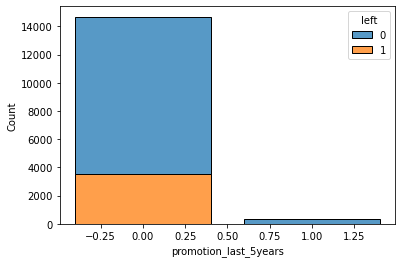

In [36]:
sns.histplot(data=data,x="promotion_last_5years",hue='left',discrete=True,shrink=0.8,multiple='stack')

In [37]:
# percentage of employee left who are not promoted within 5 years
data.loc[data["promotion_last_5years"]==0,'left'].mean()

0.24196185286103541

In [38]:
# percentage of employee left who are promoted within 5 years
data.loc[data["promotion_last_5years"]==1,'left'].mean()

0.05956112852664577

## The relationship between the position and whether to leave

In [39]:
v5 = data["sales"].value_counts()
v5

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [40]:
v5_1 = data.loc[data["left"]==1,"sales"].value_counts()
v5_1 = v5_1.reindex(index=v5.index) #make the index same as v5
v5_1

sales          1014
technical       697
support         555
IT              273
product_mng     198
marketing       203
RandD           121
accounting      204
hr              215
management       91
Name: sales, dtype: int64

In [41]:
v5_rate = data.groupby(["sales","left"],as_index=False).size()
v5_rate = v5_rate.pivot(index="sales",columns="left",values="size")
v5_rate["total"] = v5_rate[0]+v5_rate[1]
v5_rate = v5_rate.sort_values(by="total",ascending=False)
v5_rate = v5_rate.drop(columns="total")
v5_rate = v5_rate.div(v5_rate.sum(axis=1), axis=0)
v5_rate

left,0,1
sales,,
sales,0.755072,0.244928
technical,0.743750,0.256250
support,0.751009,0.248991
IT,0.777506,0.222494
product_mng,0.780488,0.219512
marketing,0.763403,0.236597
RandD,0.846252,0.153748
accounting,0.734029,0.265971
hr,0.709066,0.290934


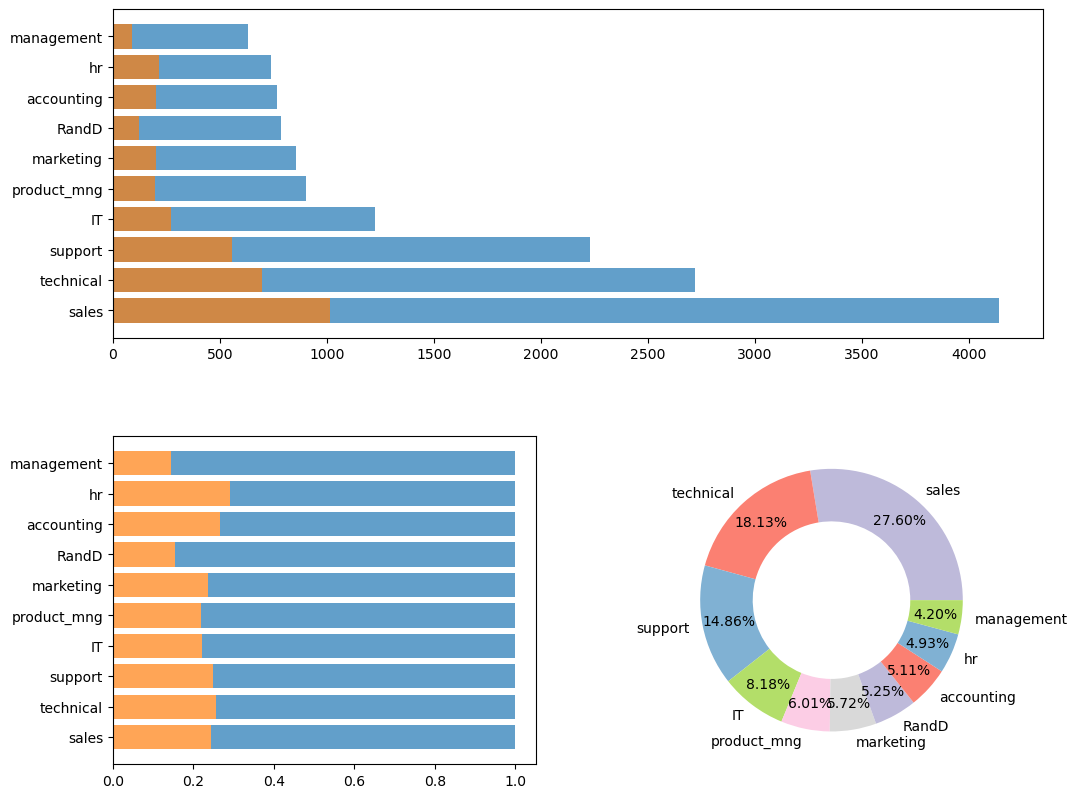

In [42]:
colors = plt.get_cmap('Set3')(np.linspace(0.2, 0.7, len(v2)))
plt.figure(figsize=(12,10),dpi=100)
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.3)

plt.subplot(grid[0, :])
plt.barh(y=v5.index,width=v5,alpha=0.7)
plt.barh(y=v5_1.index,width=v5_1,color="#ff7f0e",alpha=0.7)

plt.subplot(grid[1, 0])
plt.barh(y=v5_rate.index,width=v5_rate[1],color="#ff7f0e",alpha=0.7)
plt.barh(y=v5_rate.index,width=v5_rate[0],left=v5_rate[1],color="#1f77b4",alpha=0.7)

plt.subplot(grid[1, 1])
plt.pie(v5,autopct="%.2f%%",radius=1,pctdistance=0.8,labels=v5.index,colors=colors,wedgeprops={"width":0.4});

## The relationship between salary level and whether to leave

In [43]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [44]:
v6_rate = data.groupby(['salary','left'],as_index=False).size()
v6_rate = v6_rate.pivot(index='salary',columns="left",values="size")
v6_rate = v6_rate.div(v6_rate.sum(axis=1), axis=0)
#v6_rate = v6_rate.reindex(['low', 'medium', 'high'])
v6_rate = v6_rate.reindex(data['salary'].value_counts().index)
v6_rate

left,0,1
low,0.703116,0.296884
medium,0.795687,0.204313
high,0.933711,0.066289


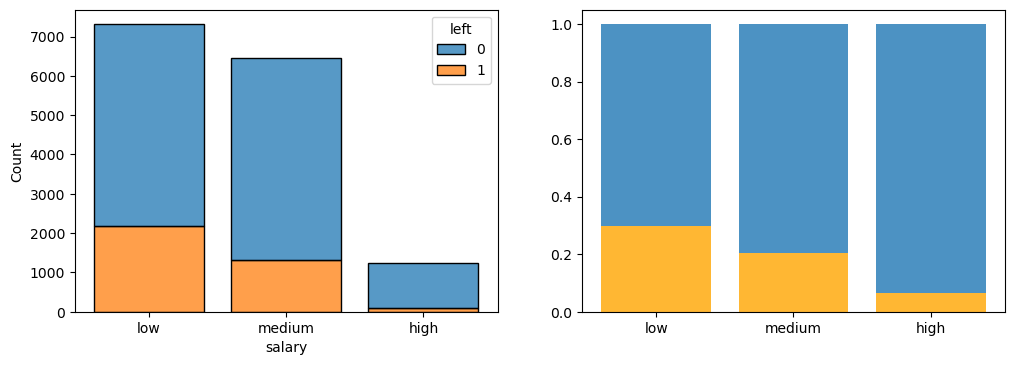

In [45]:
fig,ax = plt.subplots(1,2,figsize=(12,4),dpi=100)

sns.histplot(data=data,x='salary',hue='left',multiple='stack',shrink=0.8,discrete=True,ax=ax[0])

plt.bar(x=v6_rate.index,height=v6_rate[1],color='orange',alpha=0.8)
plt.bar(x=v6_rate.index,height=v6_rate[0],bottom=v6_rate[1],alpha=0.8);

# Modeling

### Changing text-based variables to numeric

In [46]:
from sklearn.preprocessing import OrdinalEncoder

In [47]:
d1 = OrdinalEncoder().fit_transform(data.iloc[:,-2:])
d1 = pd.DataFrame(d1,columns=data.iloc[:,-2:].columns)
df = pd.concat([data.iloc[:,:-2],d1],axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7.0,1.0
1,0.80,0.86,5,262,6,0,1,0,7.0,2.0
2,0.11,0.88,7,272,4,0,1,0,7.0,2.0
3,0.72,0.87,5,223,5,0,1,0,7.0,1.0
4,0.37,0.52,2,159,3,0,1,0,7.0,1.0


### seperate left as tag

In [48]:
x = df.loc[:,df.columns!='left']
y = df.loc[:,'left']

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=0,test_size=0.3)

### build benchmark

In [50]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,auc

In [51]:
clf = LR(max_iter=200)
clf = clf.fit(xtrain,ytrain)
print('train score:',clf.score(xtrain,ytrain))
print('test score:',clf.score(xtest,ytest))

train score: 0.764168016001524
test score: 0.7662222222222222


/Users/chenjy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
confusion_matrix(ytrain,clf.predict(xtrain))

array([[7380,  586],
       [1890,  643]])

In [53]:
roc_auc_score(ytrain,clf.predict(xtrain))

0.5901432747288887

In [54]:
print(classification_report(ytrain,clf.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      7966
           1       0.52      0.25      0.34      2533

    accuracy                           0.76     10499
   macro avg       0.66      0.59      0.60     10499
weighted avg       0.73      0.76      0.73     10499



## Model optimization

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
mms = MinMaxScaler()
mms = mms.fit(xtrain)
xtrain_mms = mms.transform(xtrain)
xtest_mms = mms.transform(xtest)

In [57]:
clf =LR()
clf = clf.fit(xtrain_mms,ytrain)
print('train score after normalization:',clf.score(xtrain_mms,ytrain))
print('test score after normalization:',clf.score(xtest_mms,ytest))

train score after normalization: 0.7655014763310791
test score after normalization: 0.7666666666666667


In [58]:
confusion_matrix(ytrain,clf.predict(xtrain_mms))

array([[7395,  571],
       [1891,  642]])

In [59]:
roc_auc_score(ytrain,clf.predict(xtrain_mms))

0.5908873817157583

In [60]:
print(classification_report(ytrain,clf.predict(xtrain_mms)))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      7966
           1       0.53      0.25      0.34      2533

    accuracy                           0.77     10499
   macro avg       0.66      0.59      0.60     10499
weighted avg       0.73      0.77      0.73     10499



In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
parameters = {'C':np.linspace(0.01,10,10)
              ,'solver':['newton-cg','lbfgs'
              ,'liblinear','sag','saga']
              ,'class_weight':[{1:i}for i in np.linspace(1,10,10)]}

In [63]:
GS = GridSearchCV(LR(max_iter=200),parameters,cv=5,scoring='f1')


In [64]:
GS.fit(xtrain,ytrain)
#increase the max_iter but the score didn't rise a lot but waste too much time. ignore the warning

/Users/chenjy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chenjy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid={'C': array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
       10.  ]),
                         'class_weight': [{1: 1.0}, {1: 2.0}, {1: 3.0},
                                          {1: 4.0}, {1: 5.0}, {1: 6.0},
                                          {1: 7.0}, {1: 8.0}, {1: 9.0},
                                          {1: 10.0}],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [65]:
GS.best_params_

{'C': 0.01, 'class_weight': {1: 3.0}, 'solver': 'saga'}

In [66]:
best_LR = GS.best_estimator_
best_LR

LogisticRegression(C=0.01, class_weight={1: 3.0}, max_iter=200, solver='saga')

In [67]:
best_LR.fit(xtrain,ytrain)
print("trian：",best_LR.score(xtrain,ytrain))
print("test：",best_LR.score(xtest,ytest))
#increase the max_iter but the score didn't rise a lot but waste too much time. ignore the warning

trian： 0.7735974854748071
test： 0.7695555555555555


/Users/chenjy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [70]:
confusion_matrix(ytest,best_LR.predict(xtest))

array([[2587,  875],
       [ 162,  876]])

In [72]:
roc_auc_score(ytest,best_LR.predict(xtest))

0.7955932786354242

In [73]:
print(classification_report(ytest,best_LR.predict(xtest)))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83      3462
           1       0.50      0.84      0.63      1038

    accuracy                           0.77      4500
   macro avg       0.72      0.80      0.73      4500
weighted avg       0.84      0.77      0.79      4500

